## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 


**План проекта:**
- Изучение данных;
- Предобработка данных;
- Исследовательский анализ;
- Исследование фильмов, которые получили государственную поддержку.


**Описание данных:**
1. `mkrf_movies`
    - `title` — название фильма;
    - `puNumber` — номер прокатного удостоверения;
    - `show_start_date` — дата премьеры фильма;
    - `type` — тип фильма;
    - `film_studio` — студия-производитель;
    - `production_country` — страна-производитель;
    - `director` — режиссёр;
    - `producer` — продюсер;
    - `age_restriction` — возрастная категория;
    - `refundable_support` — объём возвратных средств государственной поддержки;
    - `nonrefundable_support` — объём невозвратных средств государственной поддержки;
    - `financing_source` — источник государственного финансирования;
    - `budget` — общий бюджет фильма;
    - `ratings` — рейтинг фильма на КиноПоиске;
    - `genres` — жанр фильма.
2. `mkrf_shows`
    - `puNumber` — номер прокатного удостоверения;
    - `box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
#загружаем датасет данные
try:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
    data2 = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    data2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [3]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data2.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
#выведем информаццию о первом датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
#выведем информаццию о втором датасете
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Вывод: в данных mkrf_movies содержится 7486 записей, в ряде столбцов есть пропуски. В данных mkrf_shows содержится 3158 записи. Объединим данные по столбцу puNumber, для этого нужно изменить тип данных в первом датасете.

In [7]:
#проверим все ли данные в столбе ябляются числами
data[~data['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#удалим пробелы в строке 804
data.loc[804, 'puNumber'] = data.loc[804, 'puNumber'].strip()
#заменим заначение в стороке 1797 на ноль
data.loc[1797, 'puNumber'] = '0'

In [9]:
#изменим тип данных в столбце puNumber перового датасета на целочисленный тип данных
data['puNumber'] = data['puNumber'].astype('int')

In [10]:
#объединяем два датасета в один
data = data.merge(data2, how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
#выводим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Вывод: изменили тип данных в столбце puNumber, объединили два датасета.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
#изменим тип столбца show_start_date с типа object на тип datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [13]:
#посмотрим униклаьные значения рейтинга
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Вывод: по данным рейтинга видно, что большая часть находиться в диапазоне от 0 до 10, остальная часть выражена в процентах. Переведем все значения в диапазон 0-10.

In [14]:
#удалим символ "%" и изменим тип данных на численный
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float')

In [15]:
#приведем все значения к одному формату "1-10"
data.loc[data['ratings'] >= 10, 'ratings'] = data['ratings'] / 10

In [16]:
#униклаьные значения рейтинга
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
#пропуски в данных
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
genres                    976
ratings                   967
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

Вывод: в четырех столбца имеется почти 96% пропусков. Столбец "budget" включается в себя столбцы "refundable_support", "nonrefundable_support", "financing_source"

In [18]:
#проверим, что пропуски с столбцах refundable_support, nonrefundable_support, budget, financing_source совпадают
data.query('budget.isna() & refundable_support.isna() & nonrefundable_support.isna() & financing_source.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод: пропуски этих четырех столбцах в одинаковых строках.

In [19]:
#уникальные значения источника финансирования
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [20]:
#заполним пропуски на "Коммерческий"
data['financing_source'] = data['financing_source'].fillna('Коммерческий')

In [21]:
#посмотрим пропуски в столбце production_country
data[data['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,Коммерческий,4.00,"мультфильм,комедия",NaN


Вывод: по названию фильмов, можно понять, что в страна-производитель - Россия

In [22]:
#заполним пропуски в двух строках на "Россия"
data['production_country'] = data['production_country'].fillna('Россия')

In [23]:
#значение столбца режиссёр заменим на "unknown"
data['director'] = data['director'].fillna('unknown')
#значение столбца студия-производитель заменим на "unknown"
data['film_studio'] = data['film_studio'].fillna('unknown')
#значение столбца продюсер заменим на "unknown"
data['producer'] = data['producer'].fillna('unknown')
#значение столбца жанр фильма заменим на "unknown"
data['genres'] = data['genres'].fillna('unknown')

In [24]:
#пропуски в данных
data.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
box_office               4328
ratings                   967
title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
financing_source            0
genres                      0
dtype: int64

Вывод: заполнили пропуски в столбце "production_country". В столбцах: "director", "film_studio", "producer", "genres", заменили пропуски на "unknown". В столбце "ratings", пропуски не заполняли, так как это может исказить данные, возможно, эти фильмы не были оценены или было недостаточное количество оценок для формирования рейтинга. в столбце "box_office" данные тоже некорректно заполнять, возможно показа фильма не было или показ был бесплатный.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [25]:
#посмотрим полные дубликаты строк
data.duplicated().sum()

0

Вывод: полностью дублирующихся строк нет.

In [26]:
#посмотрим количество уникальных значений по столбцам
data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        950
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    84
genres                    743
box_office               2938
dtype: int64

Вывод: количество уникальных названий фильмов - 6772, а количество уникальных номеров прокатного удостоверения - 7484, это объясняется тем, что один фильм могут показывать под разными номерами прокатного удостоверения. Из данных видно, что есть два дубликата номеров прокатного удостоверения.

In [27]:
#дубликаты в столбце с названием фильма
data[data['title'].duplicated(keep=False)].sort_values(by='title').head(6)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.70,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.70,"боевик,триллер,драма","18,439,240.55"


In [28]:
#дубликаты в столбце с номером прокатного удостоверения
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Коммерческий,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,Коммерческий,6.80,"комедия,криминал",NaN


Вывод: под номером 221154310 числятся два фильма, вероятнее всего повлиял человеческий фактор при заполнении дынных. По номеру 221054410 видно, что это один и тот же фильм, но у них разные данные в столбцах: студия-производитель, страна-производитель, режиссёр, продюсер, возрастная категория и рейтинг.

In [29]:
#уникальные значения страны-производителя
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Вывод: некоторые страны указаны через запятую, а другие через дефис, также встречаются опечатки и некорректное значение "2019". Это могло вызвать дубликаты. 

In [30]:
#уникальные значения возрастной категории
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [31]:
#уникальные значения студии-производителя
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [32]:
#уникальные значения режиссёра
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [33]:
#уникальные значения продюсера
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', 'unknown',
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [34]:
#уникальные значения жанра
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

Вывод: в столбцах "type" и "production_country" были выявлены неявные дубликаты, в остальных столбцах с категориальными данными имеется множество уникальных значений.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [35]:
#уникальные значения столбца типа фильма
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [36]:
#удаляем лишние пробелы
data['type'] = data['type'].str.lstrip()

Вывод: в некоторых типах фильма есть лишние пробелы вначале строки

In [37]:
#приведем данные столбца к одному виду
#замения значение "2019" на "Германия", согласно данных Кинопоиска
data['production_country'] = data['production_country'].replace([' - ', '-'], ', ', regex=True)
data['production_country'] = data['production_country'].str.replace('2019', 'Германия')
data['production_country'] = data['production_country'].str.replace('К;анада', 'Канада')
data['production_country'] = data['production_country'].str.replace('Норвения', 'Норвегия')
data['production_country'] = data['production_country'].str.replace('Порртугалия', 'Португалия')
data['production_country'] = data['production_country'].str.replace('Шри, Ланка', 'Шри-Ланка')
data['production_country'] = data['production_country'].str.replace('Изриль', 'Израиль')
data['production_country'] = data['production_country'].str.replace('Порртугалия', 'Португалия')
data['production_country'] = data['production_country'].replace(['Пуэрто, Рико', 'Пуэрто Рико'], 'Пуэрто-Рико', regex=True)
data['production_country'] = data['production_country'].str.replace('Бенльгия', 'Бельгия')
data['production_country'] = data['production_country'].str.replace('Германя', 'Германия')
data['production_country'] = data['production_country'].str.replace('Фрация', 'Франция')
data['production_country'] = data['production_country'].str.replace('Сша', 'США')
data['production_country'] = data['production_country'].str.replace('Объединенные Арабские Эмираты', 'ОАЭ')

In [38]:
#уникальные значения страны-производителя
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [39]:
#количество уникальных значений страны-производителя
data['production_country'].nunique()

830

Вывод: в столбце с типом фильма встречаются лишние пробелы вначале строки. В столбце с данными о стране-производителе все данные привели к одному виду, убрали опечатки, было 950 уникальных значений, стало - 830. Также имеется общая проблема по категориальным данным: так как данные  вносили вручную, их могли неправильно указать, например, в строках 5067, 5068 данные по одному фильму, но у них по-разному записаны категориальные данные (например, режиссер ХЭрольд Рэмис и Гарольд Реймис)

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

array([[<Axes: title={'center': 'puNumber'}>,
        <Axes: title={'center': 'show_start_date'}>,
        <Axes: title={'center': 'refundable_support'}>],
       [<Axes: title={'center': 'nonrefundable_support'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'ratings'}>],
       [<Axes: title={'center': 'box_office'}>, <Axes: >, <Axes: >]],
      dtype=object)

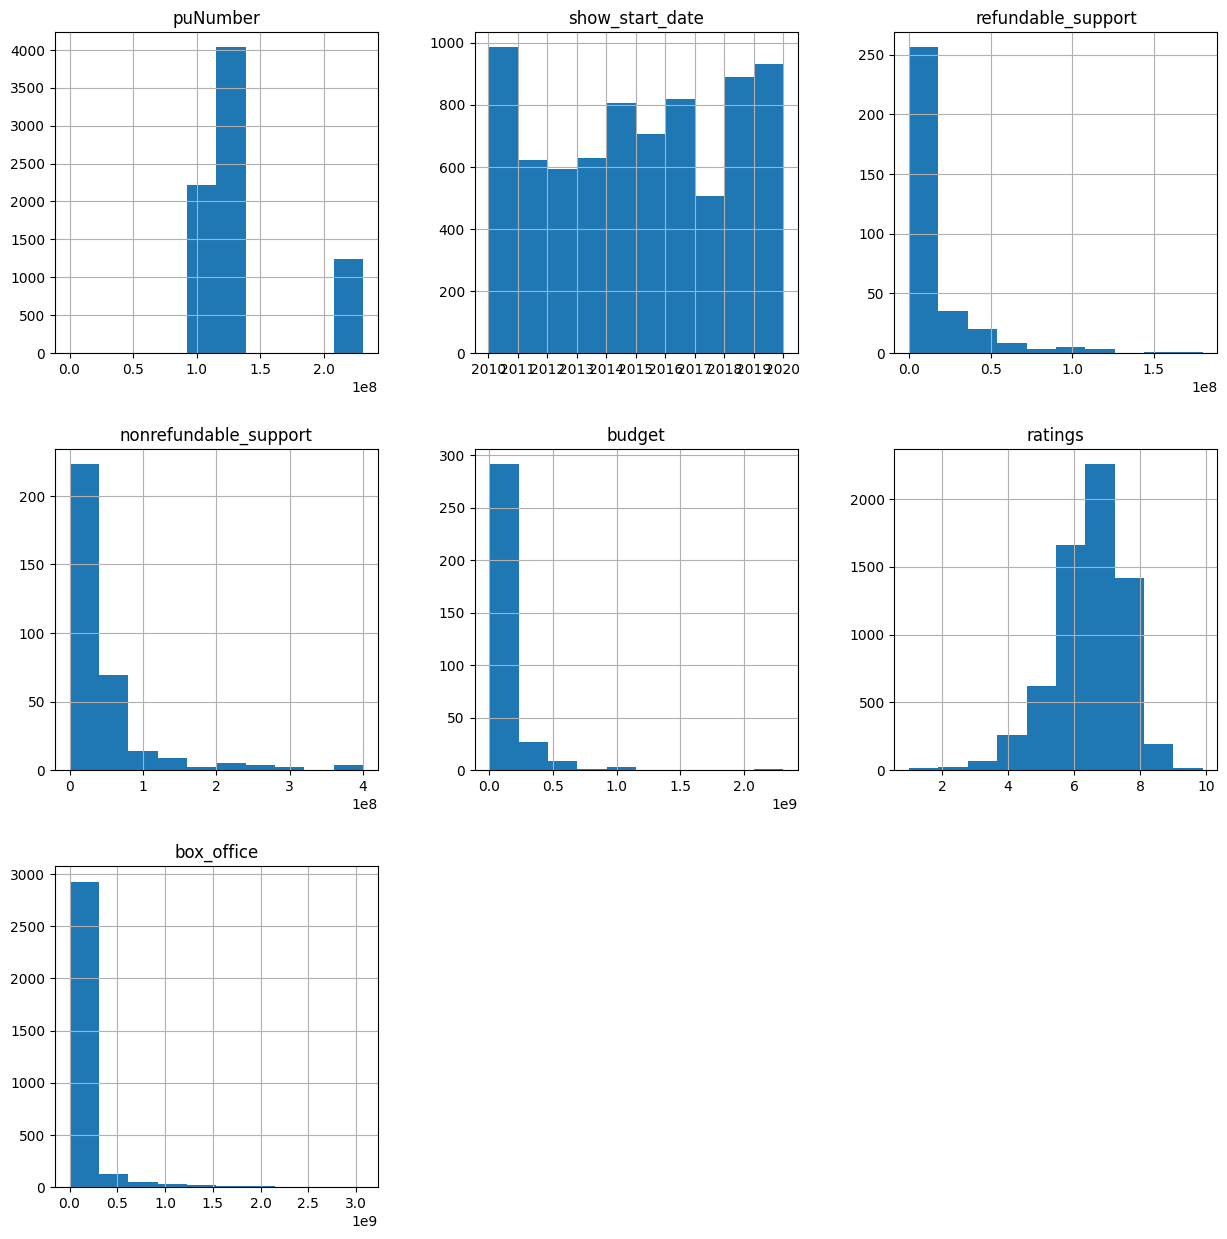

In [40]:
#строим гистограммы по всем числовым столбцам
data.hist(figsize=(15, 15))

Вывод: по данным видно, что есть аномальные значения.

Посмотрим данные общего бюджета фильма. Общий бюджет должен быть больше суммы объёма возвратных средств государственной поддержки и объём невозвратных средств государственной поддержки: budget > refundable_support + nonrefundable_support. Посмотрим сколько данных не соответствуют этому утверждению.

In [41]:
wrong_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
wrong_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Вывод: по данным видно, что скорее всего общий бюджет забыли указать. Найдем медианное значение по другим фильмам и определим процент государственной поддержки.

In [42]:
# расчёт медианного процента от поддержки в бюджете
median_budget = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).median().round(2)
median_budget

0.61

Вывод: обычно государственная поддержка составляет 61%.

In [43]:
#заменим значения общего бюджета
data.loc[wrong_budget.index, 'budget'] = (data.loc[wrong_budget.index, 'refundable_support'] + data.loc[wrong_budget.index, 'nonrefundable_support']) / median_budget
data.loc[wrong_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,704,918.03","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,950,819.67",Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","131,147,540.98",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,786,885.25",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","262,295,081.97",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,721,311.48",Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","57,377,049.18",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,836,065.57",Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","114,754,098.36",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","409,836,065.57",Фонд кино,5.60,фантастика,"1,038,321,489.00"


Вывод: не во всех фильмах указан бюджет, он указан только в тех случаях, когда была получена государственная поддержка. В данных, где была получена государственная поддержка, но общий бюджет был указан "0.0", заменили значения исходя из медианного значения процента государственной поддержки.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [44]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [45]:
def name(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].str.split(',').str[0]
    return data

In [46]:
data = name(data, ['director', 'genres'])
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Коммерческий,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Коммерческий,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [47]:
# расчёт медианного процента от поддержки в бюджете
median_budget = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).median().round(2)
median_budget

0.61

Вывод: обычно государственная поддержка составляет 61%.

Общий вывод по второму шагу: 
1. заполнили пропуски в столбце "production_country". В столбцах: "director", "film_studio", "producer", "genres", заменили пропуски на "unknown". В столбце "ratings", пропуски не заполняли, так как это может исказить данные, возможно, эти фильмы не были оценены или было недостаточное количество оценок для формирования рейтинга. в столбце "box_office" данные тоже некорректно заполнять, возможно показа фильма не было или показ был бесплатный.
2. Проверили данные на явные дубликаты, их не оказалось. в стоблцах "type" и "production_country" были выявлены неявные дубликаты, В остальных столбцах с категориальными данными имеется множество уникальных значений.
3. В столбце с типом фильма встречаются лишние пробелы вначале строки. В столбце с данными о стране-производителе все данные привели к одному виду, убрали опечатки. Также имеется общая проблема по категориальным данным: так как данные вносили вручную, их могли неправильно указать, например, в строках 5067, 5068 данные по одному фильму, но у них по-разному записаны категориальные данные (например, режиссер ХЭрольд Рэмис и Гарольд Реймис)
4. Не во всех фильмах указан бюджет, он указан только в тех случаях, когда была получена государственная поддержка. В данных, где была получена государственная поддержка, но общий бюджет был указан "0.0", заменили значения исходя из медианного значения процента государственной поддержки.
5. Создали новые столбцы с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма
6. Посчитали долю государственной поддержки от общего бюджета фильма.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [48]:
#создадим таблицу с данными о сборах фильмьв по годам
films = data.pivot_table(index='year', values='box_office', aggfunc='count')
films.columns = ['count_films']
films['count_all_films'] = data.pivot_table(index='year', values='title', aggfunc='count')
films['%_films'] = (films['count_films'] / films['count_all_films']).round(2)
films

,count_films,count_all_films,%_films
year,,,
2010,105,985,0.11
2011,109,622,0.18
2012,128,593,0.22
2013,184,630,0.29
2014,279,807,0.35
2015,465,705,0.66
2016,526,818,0.64
2017,357,505,0.71
2018,475,891,0.53


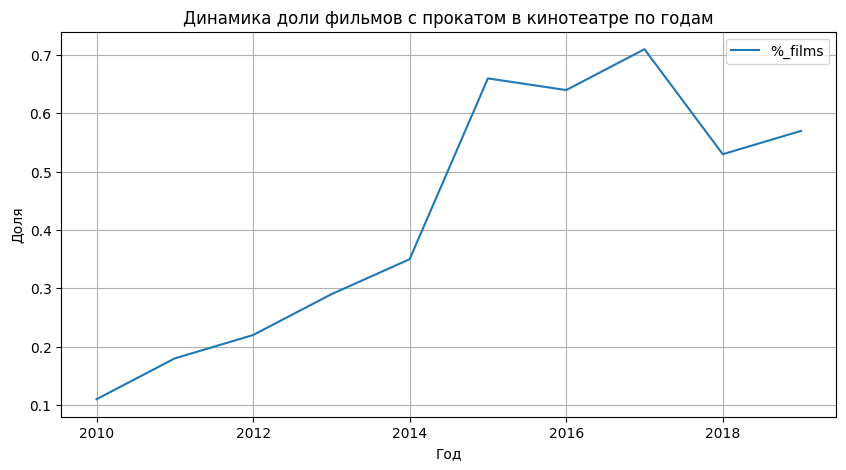

In [49]:
films.reset_index().plot(x='year', y='%_films', figsize = (10, 5), grid = True)
plt.title('Динамика доли фильмов с прокатом в кинотеатре по годам')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.show()

Вывод: полнее всего представлен 2017 год, меньше всего представлен 2010 год. в 2018 году доля фильмов с прокатом в кинотеатре достаточно сильно сократилась, при этом видно увеличение общего числа фильмов по сравнению с 2017 годом.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

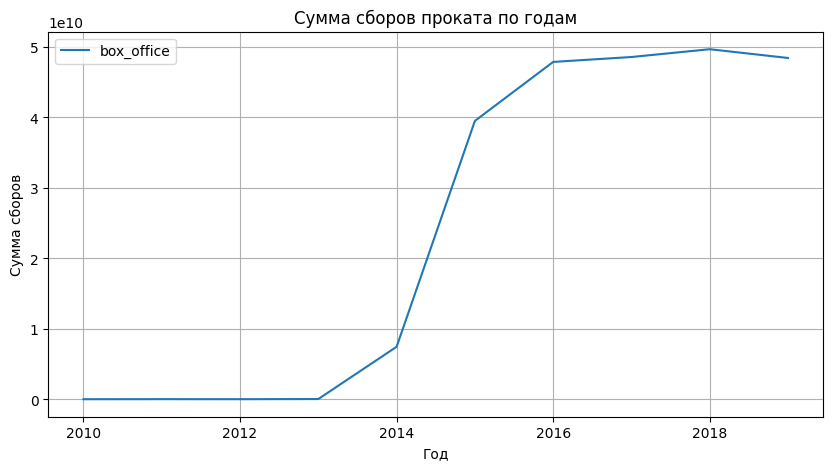

In [50]:
films_sum = data.pivot_table(index='year', values='box_office', aggfunc='sum')
films_sum.reset_index().plot(x='year', figsize = (10, 5), grid = True)
plt.title('Сумма сборов проката по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Вывод: максимальная сумма сборов была в 2018 году, минимальная - с 2010 до 2013 года.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

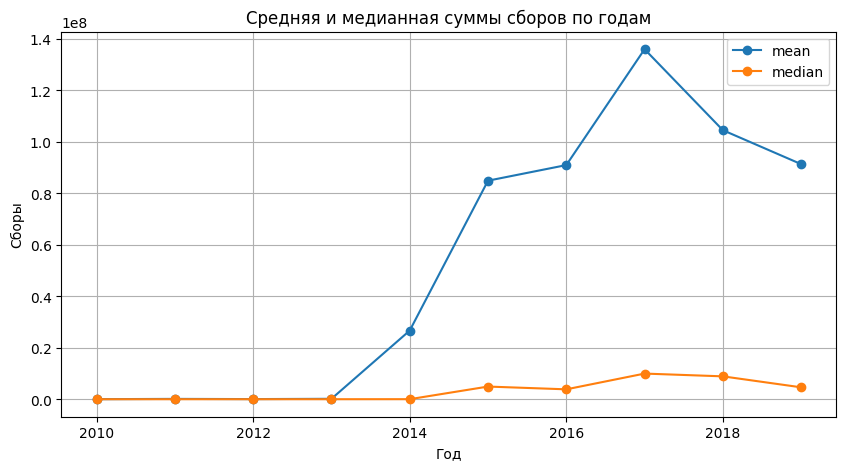

In [51]:
films_m = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
films_m.columns = ['mean', 'median']
films_m.reset_index().plot(x='year', y=['mean', 'median'], style='o-', figsize = (10, 5), grid = True)
plt.title('Средняя и медианная суммы сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

Вывод: среднее и медианное значения растут с годами, достигая пика в 2017 году. Среднее значение практически повторяет сумму сборов по годам, однако медианные значения более стабильны. По графику можно сказать, что общее число увеличивается достаточно медленно в сравнении с появлением больших значений.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

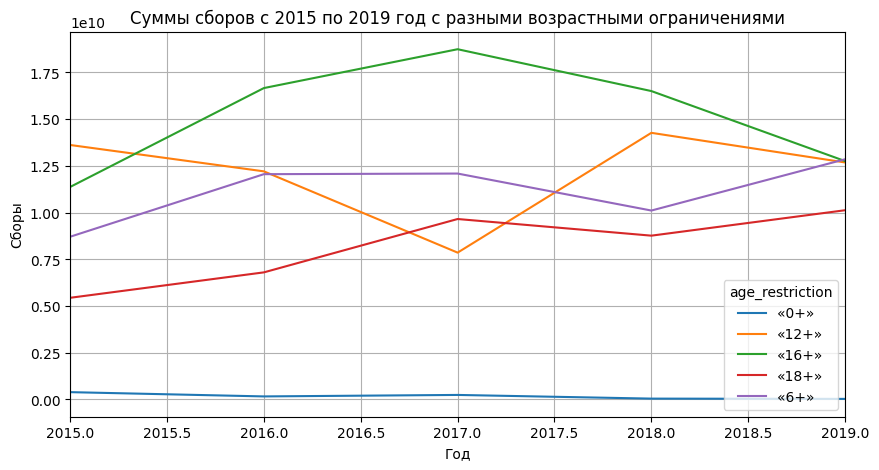

In [52]:
data['age_restriction'] = data['age_restriction'].str[:5]
films_age = data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')

films_age.reset_index().plot(x='year', xlim=[2015, 2019], figsize = (10, 5), grid = True)
plt.title('Суммы сборов с 2015 по 2019 год с разными возрастными ограничениями')
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

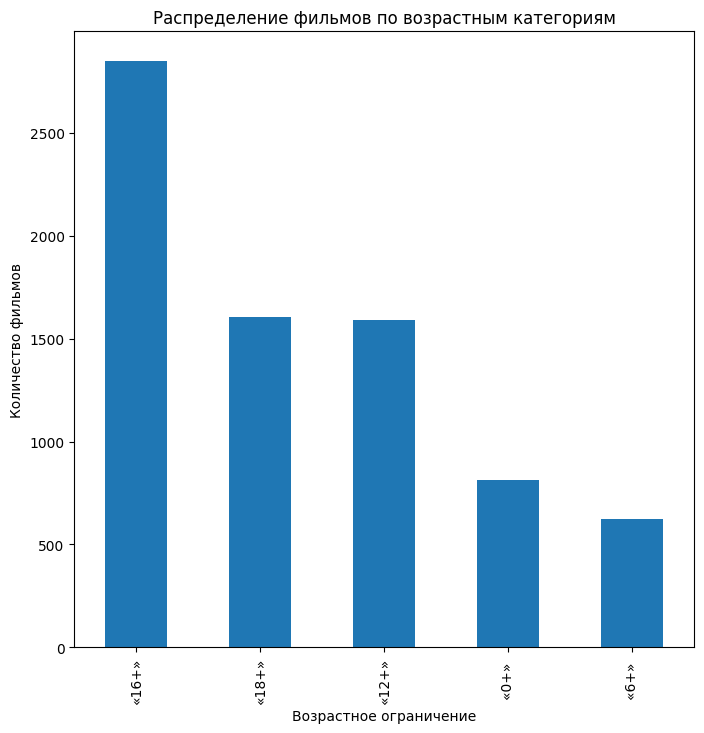

In [53]:
data['age_restriction'].value_counts().plot(y='count', kind='bar', figsize=(8, 8))
plt.title('Распределение фильмов по возрастным категориям')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Количество фильмов')
plt.show()

Вывод: по графику видно, что с середины 2015 года до 2019 года лидируют фильмы с возрастным ограничением "16+", их самое большое количество. 

Фильмы с возрастным ограничением "0+" собирают меньше всех. 

Фильмы с возрастным ограничением "12+" лидируют в 2015 году.

Фильмы с возрастным ограничением "18+": сума сборов по ним постепенно растет, но имеется небольшой спад в 2018 году.

Фильмы с возрастным ограничением "6+": в 2019 году заняли первое место по сборам, в 2017 году занимали второе место, в остальные годы - третье место.

В 2017 году наблюдается пик фильмов "16+" и спад после 2017, вероятно это произошло из-за большого количества фильмов и с 2017 года начали набирать популярность фильмы "12+"

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

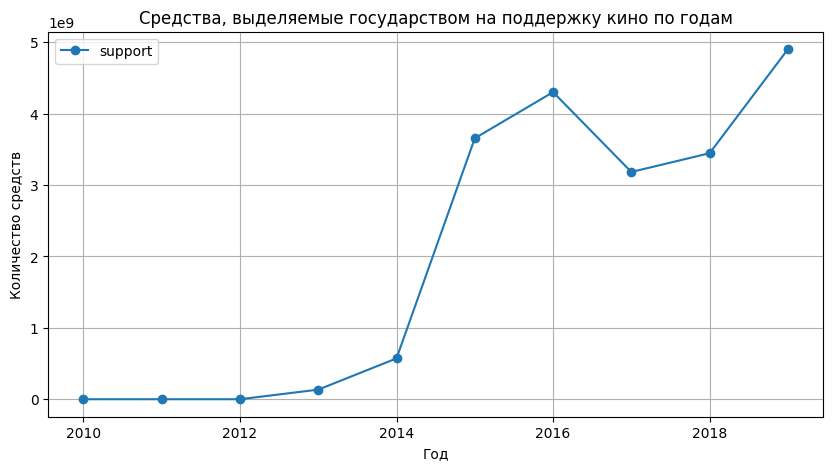

In [54]:
#создадим столбец с данными о возвратных и невозвратных стредствах
data['support'] = data['refundable_support'] + data['nonrefundable_support']
#посмотрим сколько средств выделяют на поддержку кино по годам
support_year = data.pivot_table(index='year', values='support', aggfunc='sum')
support_year.reset_index().plot(x='year', style='o-', figsize = (10, 5), grid = True)
plt.title('Средства, выделяемые государством на поддержку кино по годам')
plt.xlabel('Год')
plt.ylabel('Количество средств')
plt.show()

Вывод: по графику видно, рост объёма средств государственной поддержки до 2016 года, в 2017 году идет спад, а после объём опять возрастает. Максимальное количество выделенных средств государственной поддержки в 2018 году.

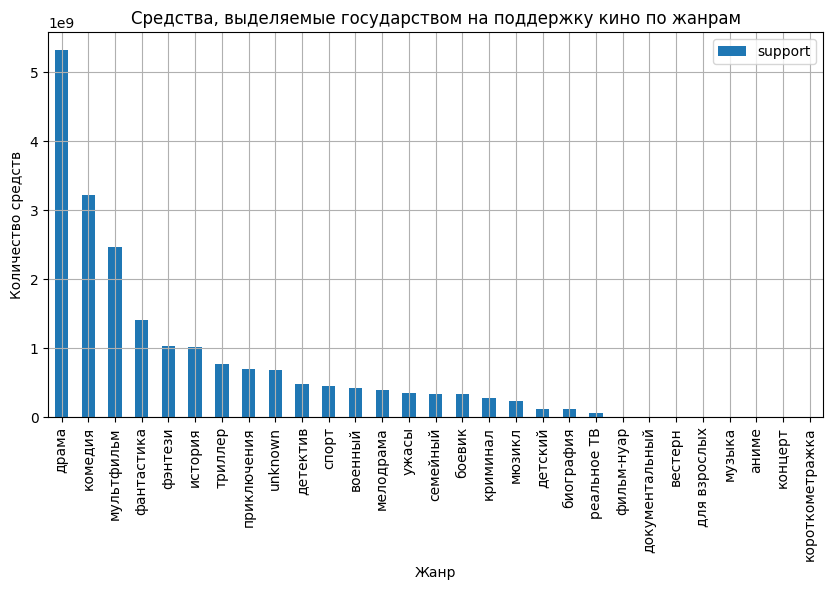

In [55]:
#посмотрим сколько средств выделяют на поддержку кино по основному жанру
support_main_genres = data.pivot_table(index='main_genres', values='support', aggfunc='sum')
support_main_genres.reset_index().sort_values(by='support', ascending=False).plot(x='main_genres', kind='bar', figsize = (10, 5), grid = True)
plt.title('Средства, выделяемые государством на поддержку кино по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество средств')
plt.show()

Вывод: больше всего средств выделяется на фильмы с жанром "драма".

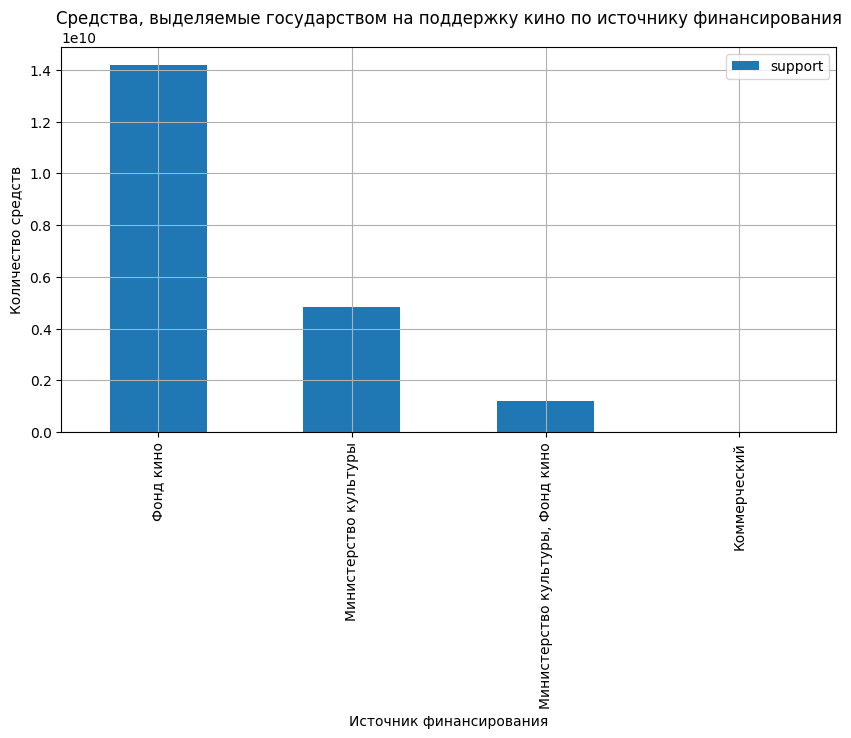

In [56]:
#посмотрим сколько средств выделяют на поддержку кино по источнику финансирования
support_financing_source = data.pivot_table(index='financing_source', values='support', aggfunc='sum')
support_financing_source.reset_index().sort_values(by='support', ascending=False).plot(x='financing_source', kind='bar', figsize = (10, 5), grid = True)
plt.title('Средства, выделяемые государством на поддержку кино по источнику финансирования')
plt.xlabel('Источник финансирования')
plt.ylabel('Количество средств')
plt.show()

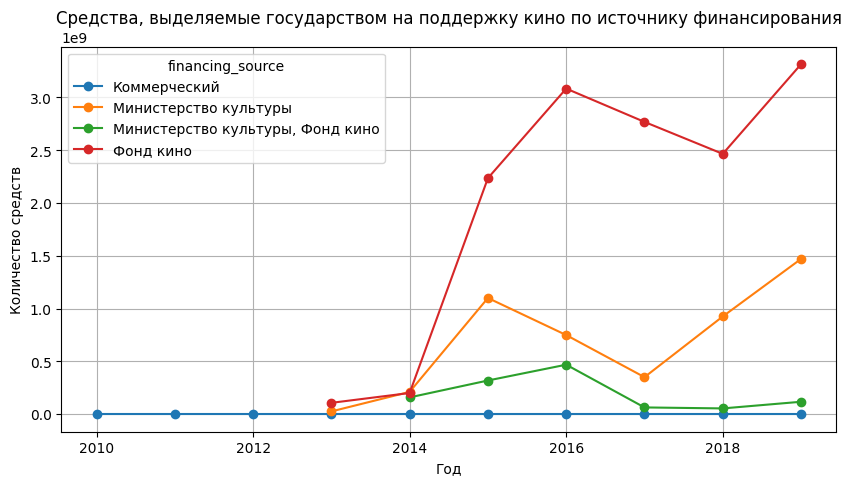

In [57]:
support_financing_source = data.pivot_table(index='year', columns='financing_source', values='support', aggfunc='sum')
support_financing_source.reset_index().plot(x='year', style='o-', figsize = (10, 5), grid = True)
plt.title('Средства, выделяемые государством на поддержку кино по источнику финансирования')
plt.xlabel('Год')
plt.ylabel('Количество средств')
plt.show()

Вывод: больше всего средств выделяет "Фонд кино", меньше всего "Министерство культуры, Фонд кино", это видно как по общим средствам, выделяемым источником финансирования, так и по выделяемым средствам по годам.

In [58]:
#добавим столбец процента окупаемости фильма
data['payback'] = data['box_office'] / data['budget']

In [59]:
data['payback'].describe()

count   318.00
mean      0.79
std       1.64
min       0.00
25%       0.02
50%       0.18
75%       0.90
max      19.21
Name: payback, dtype: float64

In [60]:
#посмотрим на сколько окупаются фильмы по годам
profit = data.pivot_table(index='year', values='payback', aggfunc=['count', 'mean', 'median', 'min','max'])
profit.columns = ['count_profit', 'mean_profit', 'median_profit', 'min_profit','max_profit']
profit

,count_profit,mean_profit,median_profit,min_profit,max_profit
year,,,,,
2010,0,NaN,NaN,NaN,NaN
2011,0,NaN,NaN,NaN,NaN
2012,0,NaN,NaN,NaN,NaN
2013,2,0.06,0.06,0.00,0.11
2014,16,0.60,0.07,0.00,5.08
2015,85,0.55,0.10,0.00,5.23
2016,60,0.65,0.15,0.00,6.64
2017,39,1.01,0.50,0.00,4.91
2018,56,1.12,0.35,0.00,9.73


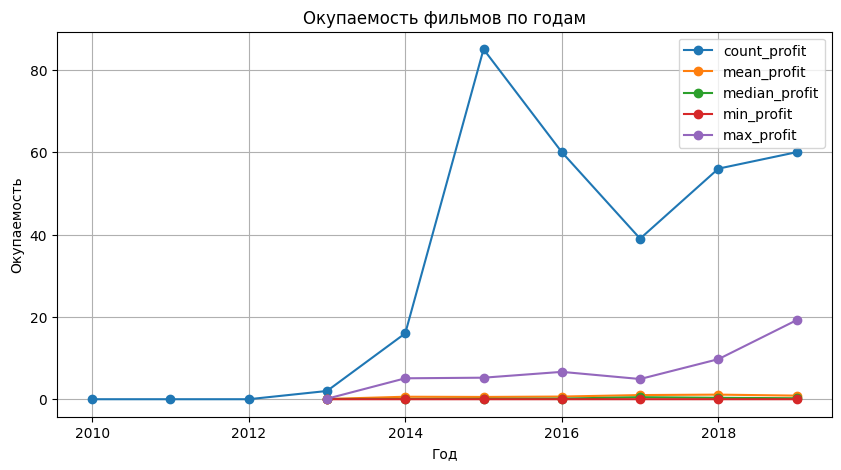

In [61]:
profit.reset_index().plot(x='year', style='o-', figsize = (10, 5), grid = True)
plt.title('Окупаемость фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Окупаемость')
plt.show()

Вывод: Если посмотреть по данным окупаемости, то в каждом году есть фильмы, которые не окупились, с 2010 по 2012 год нет данных. По максимальным значениям видно, что некоторые фильмы окупились в 5 и более раз, по медианным значениям по годам можно сказать, что большая часть фильмов не окупаются.

In [62]:
#посморим сколько фильмов с государсвенной поддержкой окупились
paid_off = (data
            .query('payback > 1')
            .pivot_table(index='year', values='payback', aggfunc=['count', 'mean', 'median', 'min','max'])
           )
paid_off.columns = ['count_paid_off', 'mean_paid_off', 'median_paid_off', 'min_paid_off','max_paid_off']
paid_off

,count_paid_off,mean_paid_off,median_paid_off,min_paid_off,max_paid_off
year,,,,,
2014,3,2.61,1.52,1.24,5.08
2015,17,2.23,1.87,1.01,5.23
2016,11,2.66,1.99,1.33,6.64
2017,13,2.48,1.85,1.03,4.91
2018,18,3.01,2.20,1.00,9.73
2019,11,3.74,2.11,1.10,19.21


In [63]:
paid_off1 = (paid_off['count_paid_off'] / profit['count_profit']) * 100
paid_off1

year
2010     NaN
2011     NaN
2012     NaN
2013     NaN
2014   18.75
2015   20.00
2016   18.33
2017   33.33
2018   32.14
2019   18.33
dtype: float64

In [64]:
paid_off1.mean()

23.482142857142858

Вывод: в среднем окупаются только 23,5% фильмов.

In [65]:
#посморим какие жанры окупились
genres_paid_off = (data
            .query('payback > 1')
            .pivot_table(index='main_genres', values='payback', aggfunc=['count', 'mean', 'median', 'min','max'])
           )
genres_paid_off.columns = ['count', 'mean', 'median', 'min','max']
genres_paid_off.sort_values(by='count', ascending=False)

,count,mean,median,min,max
main_genres,,,,,
комедия,29,3.39,2.05,1.07,19.21
драма,14,2.15,1.84,1.04,4.77
мультфильм,8,2.45,2.27,1.01,4.35
военный,3,2.32,1.69,1.00,4.26
семейный,3,1.37,1.43,1.17,1.52
ужасы,3,2.47,2.79,1.10,3.52
боевик,2,1.77,1.77,1.50,2.05
спорт,2,3.29,3.29,1.87,4.71
триллер,2,2.41,2.41,2.29,2.53


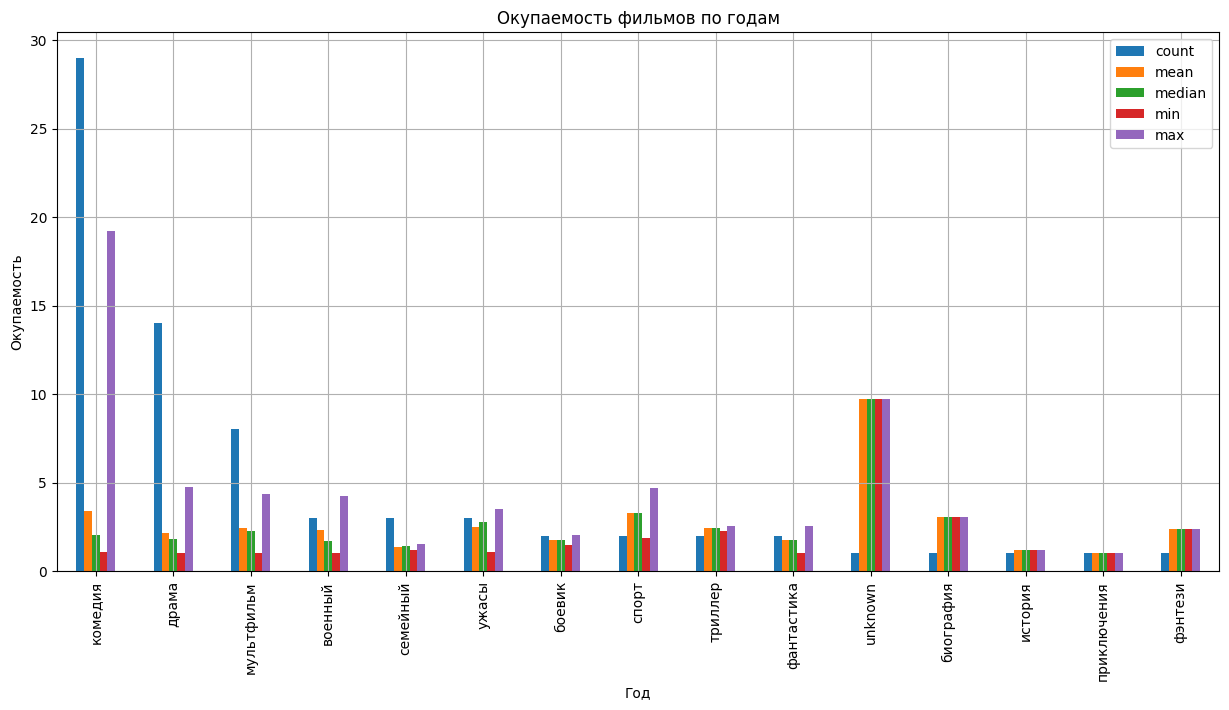

In [66]:
genres_paid_off.sort_values(by='count', ascending=False).reset_index().plot(x='main_genres', kind='bar', figsize = (15, 7), grid = True)
plt.title('Окупаемость фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Окупаемость')
plt.show()

Вывод: по количеству больше всего окупаются комедии и драмы.

In [67]:
#посморим рейтинг окупившихся фильмов по годам
ratings_paid_off = (data
            .query('payback > 1')
            .pivot_table(index='year', values='ratings', aggfunc=['count', 'mean', 'median', 'min','max'])
           )
ratings_paid_off.columns = ['count', 'mean', 'median', 'min','max']
ratings_paid_off

,count,mean,median,min,max
year,,,,,
2014,3,5.83,6.00,5.00,6.50
2015,17,6.45,6.30,4.70,8.50
2016,11,5.75,5.60,4.30,7.60
2017,13,6.12,6.40,2.90,7.50
2018,17,5.92,6.40,3.90,6.90
2019,11,6.44,6.70,5.10,8.20


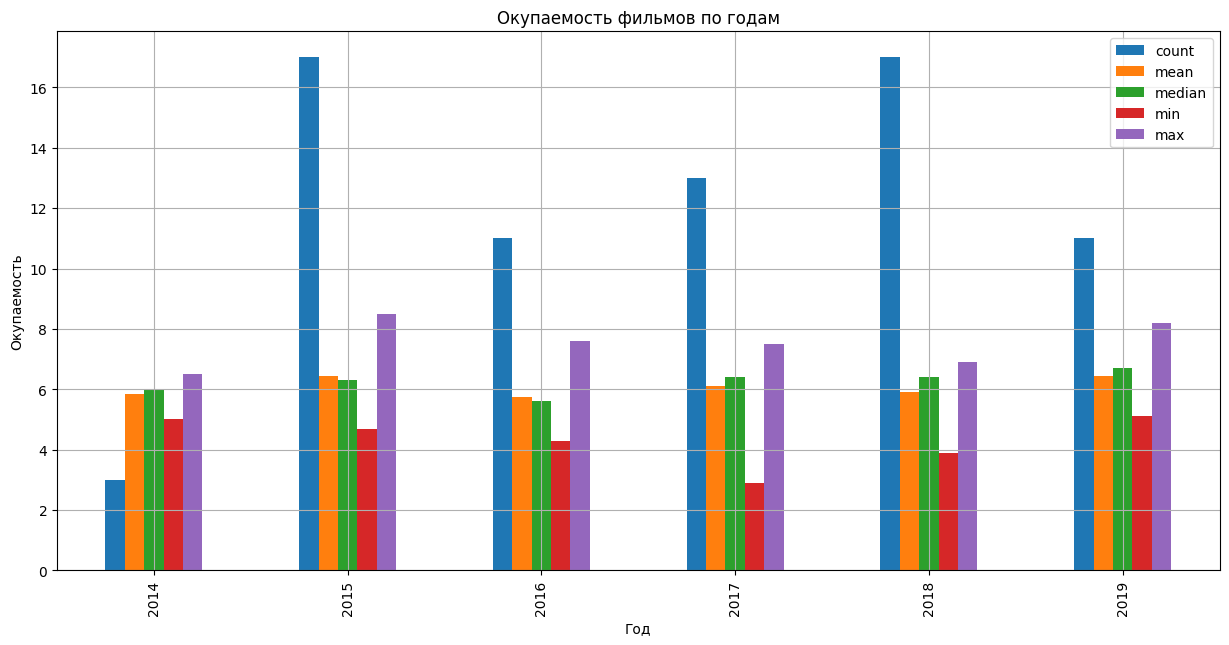

In [68]:
ratings_paid_off.reset_index().plot(x='year', kind='bar', figsize = (15, 7), grid = True)
plt.title('Окупаемость фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Окупаемость')
plt.show()

Вывод: медианные значения рейтинга с 2014 по 2019 год больше шести, и только в 2016 году рейтинг составляет 5,6.

### Шаг 5. Напишите общий вывод

1. В данных mkrf_movies содержится 7486 записей, в ряде столбцов есть пропуски. В данных mkrf_shows содержится 3158 записи. Объединили данные по столбцу puNumber, для этого изменили тип данных в первом датасете.


2. Предобработка данных:
 - В столбце рейтинга привели данные к одному виду - "1-10".
 - Заполнили пропуски в столбцах: "production_country", "director", "film_studio", "producer", "genres". В столбце "ratings", "box_office" пропуски не заполняли, так как это могло исказить данные.
 - Явных дубликатов не было выявлено, в столбцах "type" и "production_country" были выявлены неявные дубликаты, в остальных столбцах с категориальными данными имеется множество уникальных значений.
 - В столбце с типом фильма встречаются лишние пробелы вначале строки. В столбце с данными о стране-производителе все данные привели к одному виду, убрали опечатки, было 950 уникальных значений, стало - 830. Также имеется общая проблема по категориальным данным: так как данные вносили вручную, их могли неправильно указать, например, в строках 5067, 5068 данные по одному фильму, но у них по-разному записаны категориальные данные (например, режиссер ХЭрольд Рэмис и Гарольд Реймис)
 - Не во всех фильмах указан бюджет, он указан только в тех случаях, когда была получена государственная поддержка. В данных, где была получена государственная поддержка, но общий бюджет был указан "0.0", заменили значения исходя из медианного значения процента государственной поддержки.
 - Создали новые столбцы с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма
 - Доля государственной поддержки от общего бюджета фильма составляет 61%.
 
 
3. Исследовательский анализ данных:
 - Полнее всего представлен 2017 год, меньше всего представлен 2010 год. в 2018 году доля фильмов с прокатом в кинотеатре достаточно сильно сократилась, при этом видно увеличение общего числа фильмов по сравнению с 2017 годом.
 - Максимальная сумма сборов была в 2018 году, минимальная - с 2010 до 2013 года.
 - Среднее и медианное значения растут с годами, достигая пика в 2017 году. Среднее значение практически повторяет сумму сборов по годам, однако медианные значения более стабильны. По графику можно сказать, что общее число увеличивается достаточно медленно в сравнении с появлением больших значений.
 - С середины 2015 года до 2019 года лидируют фильмы с возрастным ограничением "16+", их самое большое количество.
 - Фильмы с возрастным ограничением "0+" собирают меньше всех.
 - Фильмы с возрастным ограничением "12+" лидируют в 2015 году.
 - Фильмы с возрастным ограничением "18+": сума сборов по ним постепенно растет, но имеется небольшой спад в 2018 году.
 - Фильмы с возрастным ограничением "6+": в 2019 году заняли первое место по сборам, в 2017 году занимали второе место, в остальные годы - третье место.
 - В 2017 году наблюдается пик фильмов "16+" и спад после 2017, вероятно это произошло из-за большого количества фильмов и с 2017 года начали набирать популярность фильмы "12+"
 - Объём средств государственной поддержки увеличивается до 2016 года, в 2017 году идет спад, а после объём опять возрастает. Максимальное количество выделенных средств государственной поддержки в 2018 году.
 - Больше всего средств выделяет "Фонд кино", меньше всего "Министерство культуры, Фонд кино", это видно как по общим средствам, выделяемым источником финансирования, так и по выделяемым средствам по годам.
 
 
4. Исследование фильмов, которые получили государственную поддержку:
 - Если посмотреть по данным окупаемости, то в каждом году есть фильмы, которые не окупились, с 2010 по 2012 год нет данных. По максимальным значениям видно, что некоторые фильмы окупились в 5 и более раз, по медианным значениям по годам можно сказать, что большая часть фильмов не окупаются.
 - Больше всего средств выделяется на фильмы с жанром "драма".
 - больше всего средств выделяет "Фонд кино", меньше всего "Министерство культуры, Фонд кино", это видно как по общим средствам, выделяемым источником финансирования, так и по выделяемым средствам по годам.
 - В среднем окупаются только 23,5% фильмов.
 - по количеству фильмов больше всего окупаются комедии и драмы.
 - Медианные значения рейтинга с 2014 по 2019 год больше шести, и только в 2016 году рейтинг составляет 5,6.